# Word2Vec
- **Source:** https://www.youtube.com/watch?v=64qSgA66P-8

Here I implement word2vec with very simple example using tensorflow  
word2vec is vector representation for words with similarity

# Collect Data
we will use only 10 sentences to create word vectors

In [0]:
corpus = ['king is a strong man', 
          'queen is a wise woman', 
          'boy is a young man',
          'girl is a young woman',
          'prince is a young king',
          'princess is a young queen',
          'man is strong', 
          'woman is pretty',
          'prince is a boy will be king',
          'princess is a girl will be queen']

In [2]:
len(corpus)

10

# Remove stop words
In order for efficiency of creating word vector, we will remove commonly used words

In [0]:
def remove_stop_words(corpus):
    stop_words = ['is', 'a', 'will', 'be']
    results = []
    for text in corpus:
        tmp = text.split(' ')
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))
    
    return results

In [0]:
corpus = remove_stop_words(corpus)

In [5]:
corpus

['king strong man',
 'queen wise woman',
 'boy young man',
 'girl young woman',
 'prince young king',
 'princess young queen',
 'man strong',
 'woman pretty',
 'prince boy king',
 'princess girl queen']

In [0]:
words = []
for text in corpus:
    for word in text.split(' '):
        words.append(word)

words = set(words)

here we have word set by which we will have word vector

In [7]:
words

{'boy',
 'girl',
 'king',
 'man',
 'pretty',
 'prince',
 'princess',
 'queen',
 'strong',
 'wise',
 'woman',
 'young'}

In [8]:
len(words)

12

# Data Generation
we will generate label for each word using skip gram.  

In [0]:
word2int = {}

for i,word in enumerate(words):
    word2int[word] = i

In [11]:
word2int

{'boy': 7,
 'girl': 10,
 'king': 1,
 'man': 2,
 'pretty': 0,
 'prince': 8,
 'princess': 4,
 'queen': 6,
 'strong': 3,
 'wise': 5,
 'woman': 9,
 'young': 11}

In [0]:
sentences = []
for sentence in corpus:
    sentences.append(sentence.split())

In [13]:
sentences

[['king', 'strong', 'man'],
 ['queen', 'wise', 'woman'],
 ['boy', 'young', 'man'],
 ['girl', 'young', 'woman'],
 ['prince', 'young', 'king'],
 ['princess', 'young', 'queen'],
 ['man', 'strong'],
 ['woman', 'pretty'],
 ['prince', 'boy', 'king'],
 ['princess', 'girl', 'queen']]

In [0]:
WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1] : 
            if neighbor != word:
                data.append([word, neighbor])

In [16]:
data[:5]

[['king', 'strong'],
 ['king', 'man'],
 ['strong', 'king'],
 ['strong', 'man'],
 ['man', 'king']]

In [20]:
for text in corpus:
    print(text)

king strong man
queen wise woman
boy young man
girl young woman
prince young king
princess young queen
man strong
woman pretty
prince boy king
princess girl queen


In [0]:
import pandas as pd
df = pd.DataFrame(data, columns = ['input', 'label'])

In [22]:
df.head(10)

,input,label
0,king,strong
1,king,man
2,strong,king
3,strong,man
4,man,king
5,man,strong
6,queen,wise
7,queen,woman
8,wise,queen
9,wise,woman


In [23]:
df.shape

(52, 2)

# Define Tensorflow Graph

In [25]:
import tensorflow as tf
import numpy as np

In [27]:
ONE_HOT_DIM = len(words); ONE_HOT_DIM

12

In [0]:
# function to convert numbers to one hot vectors
def to_one_hot_encoding(data_point_index):
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding

X = [] # input word
Y = [] # target word

for x, y in zip(df['input'], df['label']):
    X.append(to_one_hot_encoding(word2int[ x ]))
    Y.append(to_one_hot_encoding(word2int[ y ]))

# convert them to numpy arrays
X_train = np.asarray(X)
Y_train = np.asarray(Y)

In [30]:
X_train.shape

(52, 12)

In [32]:
Y_train.shape

(52, 12)

In [37]:
pd.get_dummies(df['input'], drop_first=True).shape

(52, 11)

In [0]:
# making placeholders for X_train and Y_train
x = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))
y_label = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))

In [0]:
# word embedding will be 2 dimension for 2d visualization
EMBEDDING_DIM = 2 

In [43]:
ONE_HOT_DIM

12

In [0]:
# hidden layer: which represents word vector eventually
W1 = tf.Variable(tf.random_normal([ONE_HOT_DIM, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([1])) #bias
hidden_layer = tf.add(tf.matmul(x,W1), b1) # X . W1 + b1

In [0]:
# output layer
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, ONE_HOT_DIM]))
b2 = tf.Variable(tf.random_normal([1]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_layer, W2), b2)) # soft(h*W2+b2)

In [0]:
# loss function: cross entropy
loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), axis=[1]))

In [0]:
# Optimizer
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

# Train

In [48]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) 

iteration = 20000
for i in range(iteration):
    # input is X_train which is one hot encoded word
    # label is Y_train which is one hot encoded neighbor word
    sess.run(train_op, feed_dict={x: X_train, y_label: Y_train})
    if i % 3000 == 0:
        print('iteration '+str(i)+' loss is : ', sess.run(loss, feed_dict={x: X_train, y_label: Y_train}))

iteration 0 loss is :  3.7877326
iteration 3000 loss is :  1.8230131
iteration 6000 loss is :  1.7283299
iteration 9000 loss is :  1.7001395
iteration 12000 loss is :  1.682
iteration 15000 loss is :  1.6700953
iteration 18000 loss is :  1.6615599


In [49]:
# Now the hidden layer (W1 + b1) is actually the word look up table
vectors = sess.run(W1 + b1)
print(vectors)

[[ 3.6112041   2.345361  ]
 [-0.13356537 -0.87538254]
 [-0.8976615  -4.4182453 ]
 [ 4.04639    -0.80924565]
 [-4.822583    3.806186  ]
 [ 0.5967971   3.5529068 ]
 [-0.88639855  0.7118491 ]
 [-0.07870828 -0.9203463 ]
 [-0.84841835 -5.177806  ]
 [-0.8586485   0.5323071 ]
 [-2.0200486   1.6342849 ]
 [ 0.7108572   0.21704124]]


# word vector in table

In [50]:
w2v_df = pd.DataFrame(vectors, columns = ['x1', 'x2'])
w2v_df['word'] = words
w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df

,word,x1,x2
0,pretty,3.611204,2.345361
1,king,-0.133565,-0.875383
2,man,-0.897662,-4.418245
3,strong,4.046390,-0.809246
4,princess,-4.822583,3.806186
5,wise,0.596797,3.552907
6,queen,-0.886399,0.711849
7,boy,-0.078708,-0.920346
8,prince,-0.848418,-5.177806
9,woman,-0.858648,0.532307


# word vector in 2d chart

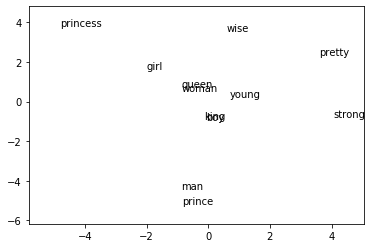

In [51]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1,x2 ))
    
PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (10,10)

plt.show()

# Implementation on Keras - Scratch

In [0]:
# Import numpy here
import numpy as np

# Import a Keras sequential model here
from keras.models import Sequential

# Import the following Keras Layers: Embedding, Flatten, Dense
from keras.layers import Embedding, Flatten, Dense

In [60]:
word2int

{'boy': 7,
 'girl': 10,
 'king': 1,
 'man': 2,
 'pretty': 0,
 'prince': 8,
 'princess': 4,
 'queen': 6,
 'strong': 3,
 'wise': 5,
 'woman': 9,
 'young': 11}

In [57]:
word2int_fun = lambda x: word2int[x]
word2int_fun('boy')

7

In [0]:
X = df['input'].apply(lambda x: word2int[x]).values
y = df['label'].apply(lambda x: word2int[x]).values

In [78]:
#y[:, None]
y.reshape(-1, 1).shape

(52, 1)

In [0]:
# Reshape X and y
X = X.reshape(52, 1)
y = y.reshape(52, 1)

In [83]:
X

array([[ 1],
       [ 1],
       [ 3],
       [ 3],
       [ 2],
       [ 2],
       [ 6],
       [ 6],
       [ 5],
       [ 5],
       [ 9],
       [ 9],
       [ 7],
       [ 7],
       [11],
       [11],
       [ 2],
       [ 2],
       [10],
       [10],
       [11],
       [11],
       [ 9],
       [ 9],
       [ 8],
       [ 8],
       [11],
       [11],
       [ 1],
       [ 1],
       [ 4],
       [ 4],
       [11],
       [11],
       [ 6],
       [ 6],
       [ 2],
       [ 3],
       [ 9],
       [ 0],
       [ 8],
       [ 8],
       [ 7],
       [ 7],
       [ 1],
       [ 1],
       [ 4],
       [ 4],
       [10],
       [10],
       [ 6],
       [ 6]])

In [81]:
y.shape

(52, 1)

In [84]:
max(X)

array([11])

In [85]:
# Define Keras model - Word2Vec 
model = Sequential([
                    Embedding(input_dim=12, output_dim=2, input_length=1),
                    Flatten(),
                    Dense(12, activation='softmax')                  
])


In [86]:
# Compile model
# Loss: https://jovianlin.io/cat-crossentropy-vs-sparse-cat-crossentropy/
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

In [87]:
model.fit(X, y, epochs=1000)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/1000





52/52 [==============================] - 0s 5ms/step - loss: 2.4840
Epoch 2/1000
52/52 [==============================] - 0s 116us/step - loss: 2.4830
Epoch 3/1000
52/52 [==============================] - 0s 140us/step - loss: 2.4821
Epoch 4/1000
52/52 [==============================] - 0s 152us/step - loss: 2.4813
Epoch 5/1000
52/52 [==============================] - 0s 122us/step - loss: 2.4805
Epoch 6/1000
52/52 [==============================] - 0s 139us/step - loss: 2.4796
Epoch 7/1000
52/52 [==============================] - 0s 121us/step - loss: 2.4788
Epoch 8/1000
52/52 [==============================] - 0s 118us/step - loss: 2.4780
Epoch 9/1000
52/52 [==============================] - 0s 118us/step - loss: 2.4771
Epoch 10/1000
52/52 [==============================] - 0s 117us/step - loss: 2.4763
Epoch 11/1000
52/52 [==============================] - 0s 118us/step -

### Visualizing weights

In [94]:
model.layers[0].get_weights()[0]

array([[ 0.7867562 ,  1.3119941 ],
       [-1.0833639 , -0.6052263 ],
       [-0.91311455, -1.6020463 ],
       [-1.4275825 ,  0.4532969 ],
       [ 1.0783024 , -0.6757577 ],
       [ 0.9572486 ,  0.80008644],
       [ 0.8106273 ,  0.34368762],
       [-0.9619231 , -0.29547948],
       [-0.8773608 , -1.0685834 ],
       [ 1.1984353 , -0.6700955 ],
       [ 0.47249597,  0.42572063],
       [-0.19824633,  0.3284137 ]], dtype=float32)

In [88]:
word2int

{'boy': 7,
 'girl': 10,
 'king': 1,
 'man': 2,
 'pretty': 0,
 'prince': 8,
 'princess': 4,
 'queen': 6,
 'strong': 3,
 'wise': 5,
 'woman': 9,
 'young': 11}

In [95]:
int2word = {v: k for k, v in word2int.items()} ; int2word

{0: 'pretty',
 1: 'king',
 2: 'man',
 3: 'strong',
 4: 'princess',
 5: 'wise',
 6: 'queen',
 7: 'boy',
 8: 'prince',
 9: 'woman',
 10: 'girl',
 11: 'young'}

In [96]:
e_weights = model.layers[0].get_weights()[0]; e_weights

array([[ 0.7867562 ,  1.3119941 ],
       [-1.0833639 , -0.6052263 ],
       [-0.91311455, -1.6020463 ],
       [-1.4275825 ,  0.4532969 ],
       [ 1.0783024 , -0.6757577 ],
       [ 0.9572486 ,  0.80008644],
       [ 0.8106273 ,  0.34368762],
       [-0.9619231 , -0.29547948],
       [-0.8773608 , -1.0685834 ],
       [ 1.1984353 , -0.6700955 ],
       [ 0.47249597,  0.42572063],
       [-0.19824633,  0.3284137 ]], dtype=float32)

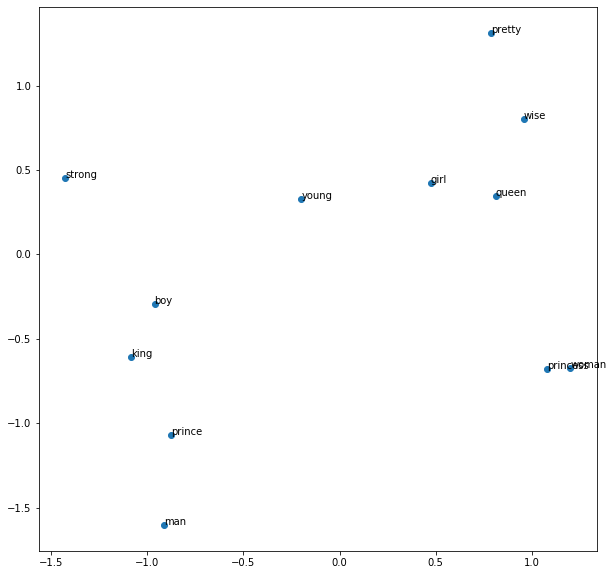

In [97]:
import matplotlib.pyplot as plt

plt.scatter(e_weights[:, 0], e_weights[:, 1])
for i, coord in enumerate(e_weights):
    plt.text(coord[0], coord[1]+0., int2word[i])